<a href="https://colab.research.google.com/github/Tar-ive/Test-Preparation-Course-Impact-Analysis/blob/main/Test_Preparation_Course_Impact_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 


In [4]:
from google.colab import files

# Upload the dataset to Google Colab
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded['exams.csv']))

# Display the first few rows of the dataset
print(df.head())


KeyboardInterrupt: ignored

   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86  


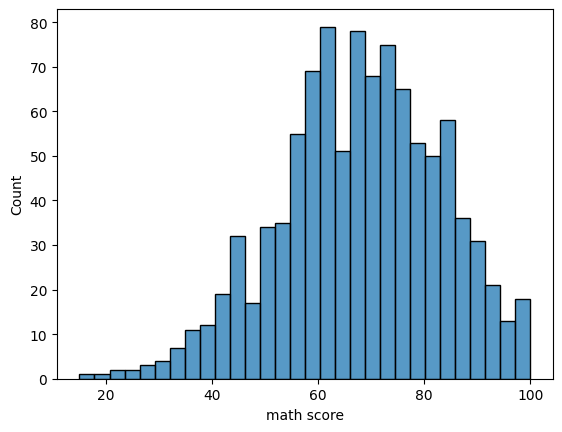

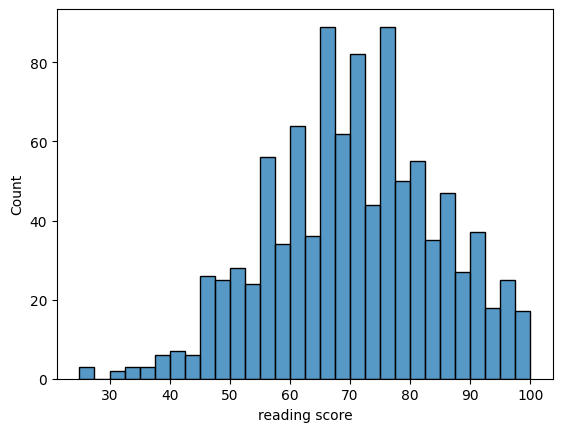

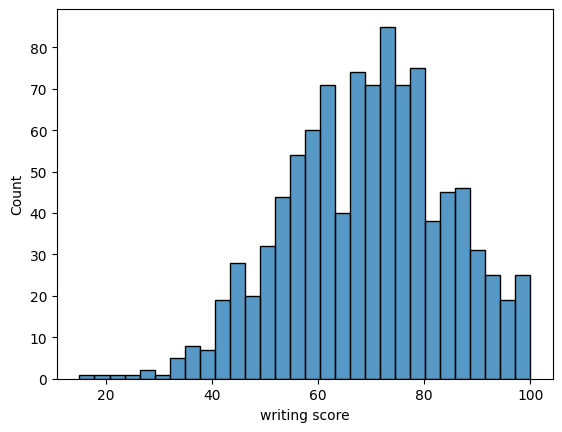

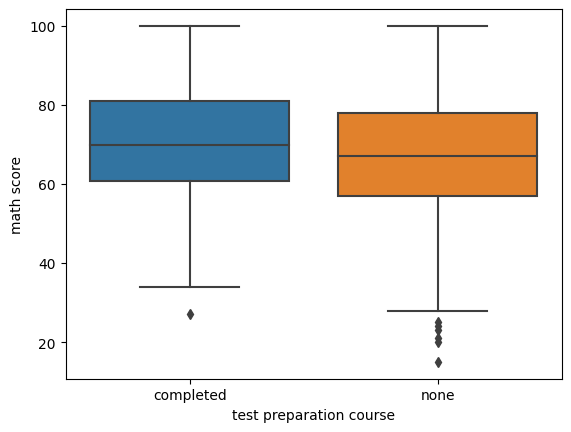

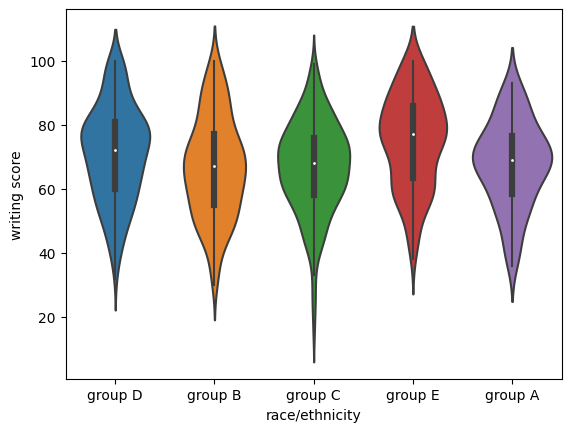

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('exams.csv')

# Display the first few rows of the dataset
print(df.head())

# Plot histograms of the math, reading, and writing scores
sns.histplot(data=df, x='math score', bins=30)
plt.show()

sns.histplot(data=df, x='reading score', bins=30)
plt.show()

sns.histplot(data=df, x='writing score', bins=30)
plt.show()

# Create a box plot of math scores grouped by whether the student completed the test preparation course or not
sns.boxplot(data=df, x='test preparation course', y='math score')
plt.show()

# Create a violin plot of writing scores grouped by race/ethnicity
sns.violinplot(data=df, x='race/ethnicity', y='writing score')
plt.show()


In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [7]:
completed_course = df[df['test preparation course'] == 'completed']
not_completed_course = df[df['test preparation course'] == 'none']

In [8]:
print('Missing values:')
print(df.isnull().sum())

print('Duplicated rows:')
print(df.duplicated().sum())

Missing values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Duplicated rows:
0


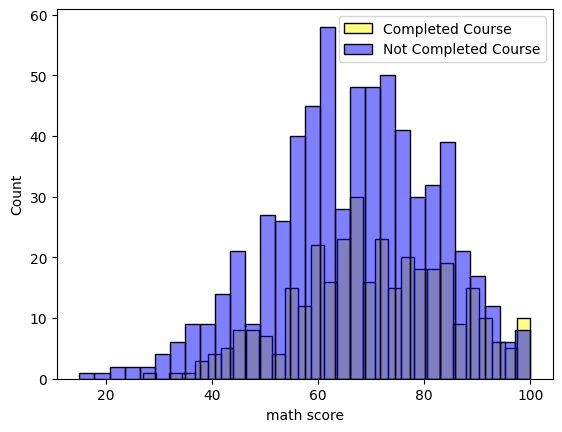

In [15]:
sns.histplot(data=completed_course, x='math score', bins=30, label='Completed Course', color='yellow', alpha=0.5)
sns.histplot(data=not_completed_course, x='math score', bins=30, label='Not Completed Course', color='blue', alpha=0.5)
plt.legend()
plt.show()

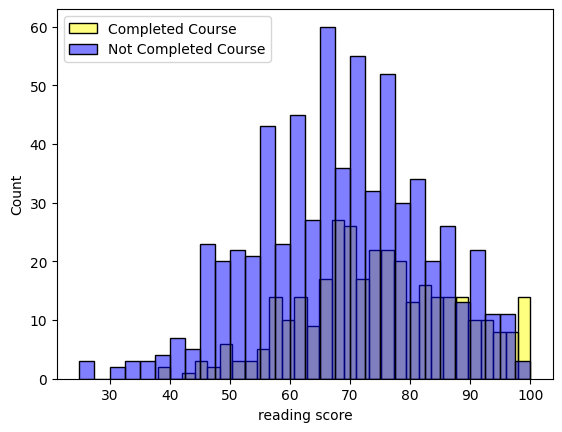

In [14]:
sns.histplot(data=completed_course, x='reading score', bins=30, label='Completed Course', color='yellow', alpha=0.5)
sns.histplot(data=not_completed_course, x='reading score', bins=30, label='Not Completed Course', color='blue', alpha=0.5)
plt.legend()
plt.show()

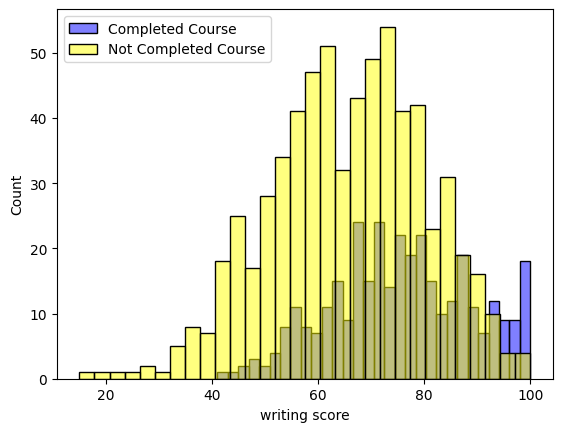

In [13]:
sns.histplot(data=completed_course, x='writing score', bins=30, label='Completed Course', color='blue', alpha=0.5)
sns.histplot(data=not_completed_course, x='writing score', bins=30, label='Not Completed Course', color='yellow', alpha=0.5)
plt.legend()
plt.show()

In [19]:
import statsmodels.formula.api as smf
import scipy.stats as stats


In [18]:
completed_scores = df[df['test preparation course'] == 'completed']['math score']
not_completed_scores = df[df['test preparation course'] == 'none']['math score']

In [20]:
f_statistic, p_value = stats.f_oneway(completed_scores, not_completed_scores)

print('F-Statistic: {:.3f}'.format(f_statistic))
print('P-Value: {:.3f}'.format(p_value))

F-Statistic: 14.563
P-Value: 0.000


In [21]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.7 MB/s eta 0:00:00


In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [34]:
df.dropna(inplace=True)

In [35]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [36]:
X = df.drop(['test preparation course'], axis=1)
y = df['test preparation course']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf


In [23]:
features = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'math score', 'reading score', 'writing score']]
target = df['test preparation course']

In [26]:
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)


In [24]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


In [28]:
train_data, test_data = train_test_split(df, test_size=0.2)

In [29]:
inputs = train_data['gender'] + ' ' + train_data['race/ethnicity'] + ' ' + train_data['parental level of education'] + ' ' + train_data['lunch']
outputs = train_data['test preparation course']

In [31]:
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification


In [38]:
data = df.to_dict('records')

In [39]:
texts = ['|'.join([d['gender'], d['race/ethnicity'], d['parental level of education'], d['lunch'], d['test preparation course']]) for d in data]
X = tokenizer(texts, padding=True, truncation=True, max_length=128)

# Extract labels
y = df.iloc[:, -1].values

TypeError: ignored

In [37]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
X = tokenizer(list(df.iloc[:, :-1].values), padding=True, truncation=True, max_length=128)
y = df.iloc[:, -1].values

ValueError: ignored

In [40]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,59,70,78
1,1,3,0,1,1,96,93,87
2,0,3,4,0,1,57,76,77
3,1,1,4,0,1,70,70,63
4,0,3,0,1,1,83,85,86
...,...,...,...,...,...,...,...,...
995,1,2,4,1,1,77,77,71
996,1,2,4,1,1,80,66,66
997,0,0,2,1,0,67,86,86
998,1,4,2,1,1,80,72,62
